In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
os.chdir("/content/drive/My Drive/voconic_labs")

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [65]:
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV ,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [7]:
confirmed_cases=pd.read_csv("/content/drive/My Drive/voconic_labs/time_series_covid19_confirmed_global.csv")

In [8]:
deaths_reported=pd.read_csv("/content/drive/My Drive/voconic_labs/time_series_covid19_deaths_global.csv")

In [9]:
recovered_cases=pd.read_csv("/content/drive/My Drive/voconic_labs/time_series_covid19_recovered_global.csv")

In [10]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525


In [11]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26


In [12]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797,799,799,799,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81,81,81,81,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118


In [13]:
#extracting all the columns using .keys() function

cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20',
       '7/11/20', '7/12/20', '7/13/20'],
      dtype='object', length=178)

# extracting only the date columns that have the information of CONFIRMED,DEATHS,RECOVERED using .loc

In [14]:
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]

In [15]:
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]

In [19]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [20]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525


# Finding the total number of CONFIRMED,DEATHS,RECOVERED and appending them to the empty lists created 
# and also checking the mortality rate

In [21]:
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]

for i in dates:
  confirmed_sum=confirmed[i].sum()
  death_sum=deaths[i].sum()
  recovered_sum=recoveries[i].sum()
  world_cases.append(confirmed_sum)
  total_deaths.append(death_sum)
  mortality_rate.append(death_sum/confirmed_sum)
  total_recovered.append(recovered_sum)




In [22]:
confirmed_sum

13104391

In [99]:
total_deaths


array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2008],
       [  2123],
       [  2248],
       [  2252],
       [  2459],
       [  2470],
       [  2630],
       [  2710],
       [  2771],
       [  2814],
       [  2873],
       [  2942],
       [  2996],
       [  3085],
       [  3160],
       [  3255],
       [  3348],
       [  3460],
       [  3559],
       [  3803],
       [  3987],
       [  4266],
       [  4611],
       [  4916],
       [  5413],
       [  5830],
       [  6471],
       [  7151],
       [  7955],
       [  8852],
       [  9958],
       [ 11436

In [23]:
death_sum

573003

In [24]:
recovered_sum

7257369

This is the sum of world cases displayed as an array which is according to the respective date

In [25]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78979,
 79543,
 80396,
 81373,
 82737,
 84114,
 86009,
 88386,
 90360,
 92938,
 95237,
 98028,
 101971,
 106009,
 109960,
 113860,
 118884,
 126547,
 132297,
 146704,
 157795,
 168941,
 183597,
 199434,
 219028,
 246949,
 276534,
 308842,
 342255,
 384420,
 425559,
 476376,
 539336,
 603736,
 671344,
 730921,
 795560,
 871976,
 948197,
 1029598,
 1112752,
 1193128,
 1264846,
 1337518,
 1414391,
 1498166,
 1584791,
 1672449,
 1749169,
 1845951,
 1915545,
 1985472,
 2066301,
 2163013,
 2250737,
 2324083,
 2404790,
 2478129,
 2553289,
 2630185,
 2719198,
 2806138,
 2890259,
 2963206,
 3031926,
 3107209,
 3184143,
 3267936,
 3354984,
 3435571,
 3513207,
 3589284,
 3669273,
 3759295,
 3848381,
 3939898,
 4023533,
 4099779,
 4176020,
 4259383,
 4344370

Convert all dates and the cases in the form of an array

In [27]:
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [28]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [30]:
world_cases

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78979],
       [   79543],
       [   80396],
       [   81373],
       [   82737],
       [   84114],
       [   86009],
       [   88386],
       [   90360],
       [   92938],
       [   95237],
       [   98028],
       [  101971],
       [  106009],
       [  109960],
       [  113860],
       [  118884],
       [  126547],
       [  132297],
       [  146704],
       [  15

In [31]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2008],
       [  2123],
       [  2248],
       [  2252],
       [  2459],
       [  2470],
       [  2630],
       [  2710],
       [  2771],
       [  2814],
       [  2873],
       [  2942],
       [  2996],
       [  3085],
       [  3160],
       [  3255],
       [  3348],
       [  3460],
       [  3559],
       [  3803],
       [  3987],
       [  4266],
       [  4611],
       [  4916],
       [  5413],
       [  5830],
       [  6471],
       [  7151],
       [  7955],
       [  8852],
       [  9958],
       [ 11436

In [29]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58359],
       [  60694],
       [  62493],
       [  64404],
       [  67002],
       [  68323],
       [  70250],
       [  72621],
       [  76031],
       [  78085],
       [  

#future forecasting for the next 10 days
#adding 10 days to the total number of days we have

In [32]:

days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [33]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

#converting all the integers to datetime format

In [35]:
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

  

Extrating only the values of the last column from the three datasets   i.e  "7/13/20"

In [36]:
latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=deaths_reported[dates[-1]]
latest_recovered=recovered_cases[dates[-1]]

In [37]:
latest_confirmed

0      34455
1       3571
2      19689
3        858
4        525
       ...  
261      732
262     1498
263      317
264     6596
265      245
Name: 7/13/20, Length: 266, dtype: int64

In [38]:
latest_deaths


0      1012
1        95
2      1018
3        52
4        26
       ... 
261      14
262     424
263       7
264      55
265       3
Name: 7/13/20, Length: 266, dtype: int64

In [39]:
latest_recovered

0      21254
1       2014
2      14019
3        803
4        118
       ...  
248      286
249      675
250      296
251     5278
252       33
Name: 7/13/20, Length: 253, dtype: int64

In [41]:
unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

## Calculating the total number of confirmed cases in each country

In [42]:
country_confirmed_cases=[]
no_cases=[]

for i in unique_countries:
  cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
  if cases>0:
    country_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_countries.remove(i)

unique_countries=[k for k, v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
  country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()


  

## Highest number of cases recorded in the US followed by brazil with our given data

In [44]:
#number of cases per country 
print('confirmed cases by country/regions:')
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')


confirmed cases by country/regions:
US:3364157 cases
Brazil:1884967 cases
India:906752 cases
Russia:732547 cases
Peru:330123 cases
Chile:317657 cases
Mexico:304435 cases
United Kingdom:291691 cases
South Africa:287796 cases
Iran:259652 cases
Spain:255953 cases
Pakistan:253604 cases
Italy:243230 cases
Saudi Arabia:235111 cases
Turkey:214001 cases
France:209640 cases
Germany:200180 cases
Bangladesh:186894 cases
Colombia:150445 cases
Canada:109984 cases
Qatar:104016 cases
Argentina:103265 cases
China:85117 cases
Egypt:83001 cases
Iraq:79735 cases
Indonesia:76981 cases
Sweden:75826 cases
Ecuador:68459 cases
Belarus:65114 cases
Belgium:62707 cases
Kazakhstan:61755 cases
Oman:58179 cases
Philippines:57006 cases
Kuwait:55508 cases
Ukraine:55285 cases
United Arab Emirates:55198 cases
Netherlands:51308 cases
Bolivia:49250 cases
Panama:47173 cases
Portugal:46818 cases
Singapore:46283 cases
Dominican Republic:45506 cases
Israel:40632 cases
Poland:38190 cases
Afghanistan:34455 cases
Bahrain:33476 

In [45]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525


In [50]:
#find the list of unique provinces
unique_provinces=list(confirmed_cases['Province/State'].unique())



In [51]:
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Island

In [52]:
#finding the number of cases per state
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
  cases=latest_confirmed[confirmed_cases['Province/State']==i].sum()
  if cases>0:
    province_confirmed_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_provinces.remove(i)

In [53]:
for i in range(len(unique_provinces)):
   print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

Australian Capital Territory:113 cases
New South Wales:3505 cases
Northern Territory:31 cases
Queensland:1071 cases
South Australia:443 cases
Tasmania:228 cases
Victoria:4224 cases
Western Australia:636 cases
Alberta:8826 cases
British Columbia:3053 cases
Grand Princess:13 cases
Manitoba:325 cases
New Brunswick:166 cases
Newfoundland and Labrador:262 cases
Nova Scotia:1066 cases
Ontario:38730 cases
Prince Edward Island:35 cases
Quebec:56621 cases
Saskatchewan:871 cases
Anhui:991 cases
Beijing:929 cases
Chongqing:582 cases
Fujian:363 cases
Gansu:167 cases
Guangdong:1650 cases
Guangxi:254 cases
Guizhou:147 cases
Hainan:171 cases
Hebei:349 cases
Heilongjiang:947 cases
Henan:1276 cases
Hong Kong:1469 cases
Hubei:68135 cases
Hunan:1019 cases
Inner Mongolia:249 cases
Jiangsu:654 cases
Jiangxi:932 cases
Jilin:155 cases
Liaoning:164 cases
Macau:46 cases
Ningxia:75 cases
Qinghai:18 cases
Shaanxi:321 cases
Shandong:793 cases
Shanghai:725 cases
Shanxi:200 cases
Sichuan:599 cases
Tianjin:203 cases

In [55]:
print(type(unique_provinces))

<class 'list'>


In [57]:
#handling missing values
nan_indices=[]

for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)

for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_cases.pop(i)

In [62]:
unique_countries


['US',
 'Brazil',
 'India',
 'Russia',
 'Peru',
 'Chile',
 'Mexico',
 'United Kingdom',
 'South Africa',
 'Iran',
 'Spain',
 'Pakistan',
 'Italy',
 'Saudi Arabia',
 'Turkey',
 'France',
 'Germany',
 'Bangladesh',
 'Colombia',
 'Canada',
 'Qatar',
 'Argentina',
 'China',
 'Egypt',
 'Iraq',
 'Indonesia',
 'Sweden',
 'Ecuador',
 'Belarus',
 'Belgium',
 'Kazakhstan',
 'Oman',
 'Philippines',
 'Kuwait',
 'Ukraine',
 'United Arab Emirates',
 'Netherlands',
 'Bolivia',
 'Panama',
 'Portugal',
 'Singapore',
 'Dominican Republic',
 'Israel',
 'Poland',
 'Afghanistan',
 'Bahrain',
 'Nigeria',
 'Romania',
 'Switzerland',
 'Armenia',
 'Guatemala',
 'Honduras',
 'Ireland',
 'Ghana',
 'Azerbaijan',
 'Japan',
 'Algeria',
 'Moldova',
 'Austria',
 'Serbia',
 'Nepal',
 'Morocco',
 'Cameroon',
 'Uzbekistan',
 'Korea, South',
 'Czechia',
 'Denmark',
 "Cote d'Ivoire",
 'Kyrgyzstan',
 'Sudan',
 'Kenya',
 'Australia',
 'El Salvador',
 'Venezuela',
 'Norway',
 'Malaysia',
 'Senegal',
 'North Macedonia',
 'Con

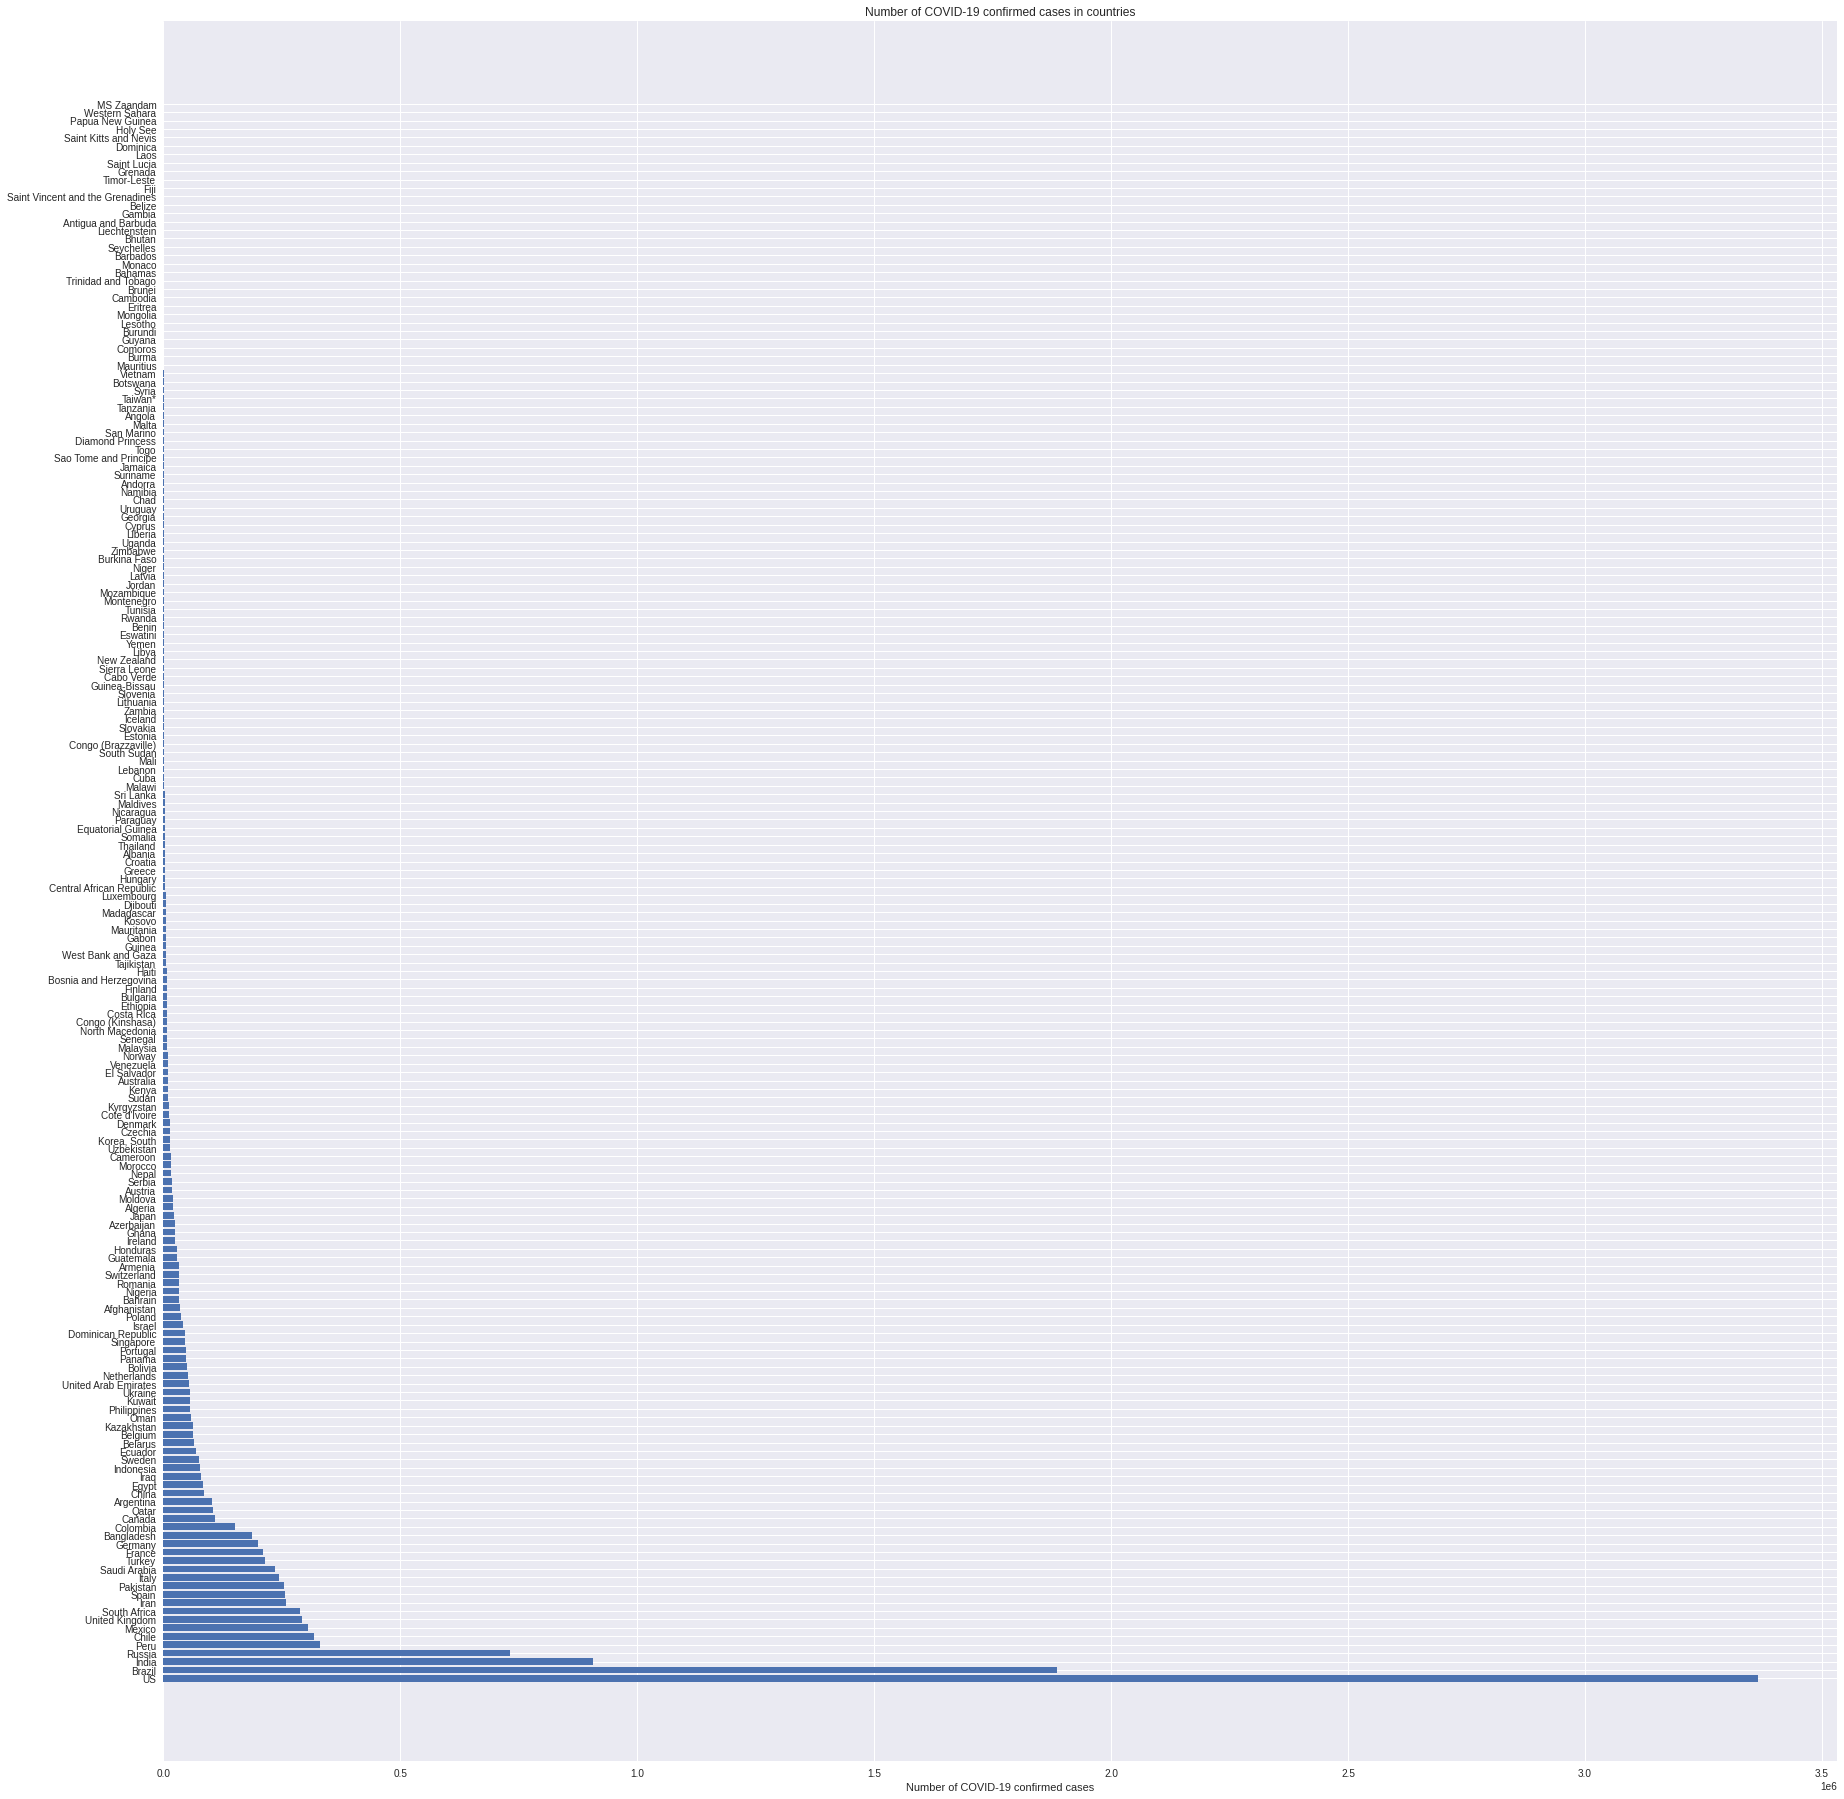

In [68]:
#visulaisation of confirmed cases of COVID-19 across the countries

plt.figure(figsize=(30,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of COVID-19 confirmed cases in countries')
plt.xlabel('Number of COVID-19 confirmed cases')
plt.show()

<function matplotlib.pyplot.show>

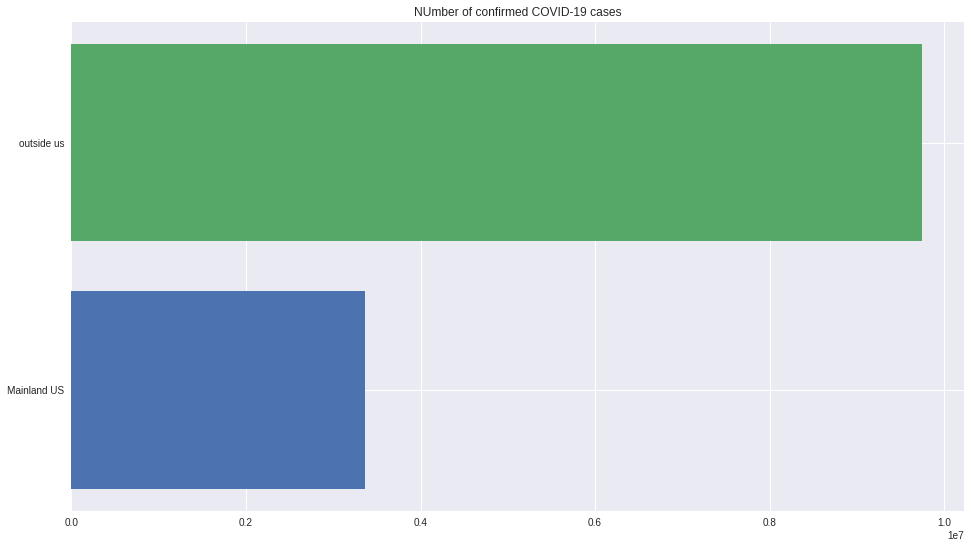

In [70]:
us_confirmed=latest_confirmed[confirmed_cases['Country/Region']=='US'].sum()
outside_mainland_us_confirmed=np.sum(country_confirmed_cases) - us_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland US',us_confirmed)
plt.barh('outside us',outside_mainland_us_confirmed)
plt.title('NUmber of confirmed COVID-19 cases')
plt.show

In [73]:

print('us:{} cases'.format(us_confirmed))

print('outside us:{} cases'.format(outside_mainland_us_confirmed))

print('total:{} cases'.format(outside_mainland_us_confirmed+us_confirmed))

us:3364157 cases
outside us:9740234 cases
total:13104391 cases


In [75]:
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
  visual_unique_countries.append(unique_countries[i])
  visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('others')
visual_confirmed_cases.append(others)




## Only the countries with highest number of cases confirmed

<function matplotlib.pyplot.show>

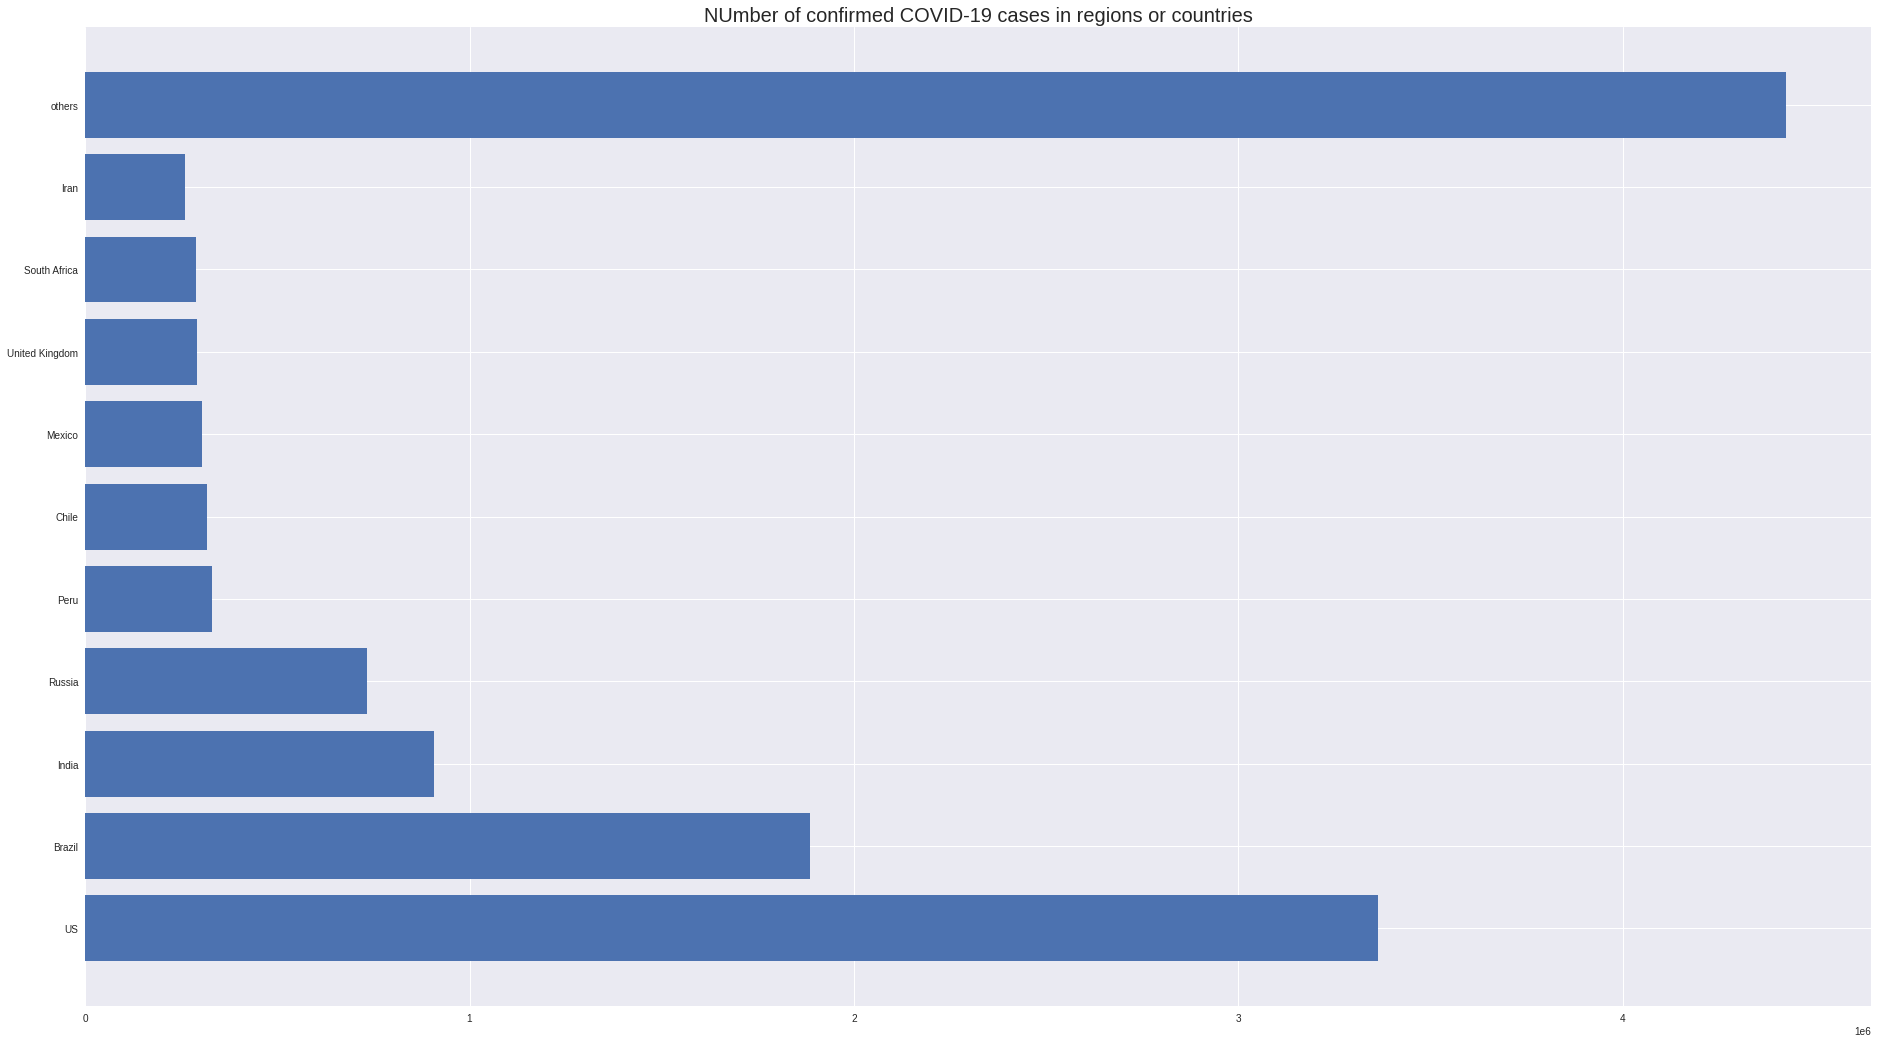

In [77]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)

plt.title('NUmber of confirmed COVID-19 cases in regions or countries',size=20)
plt.show

## Here is the pie chart representaion of confirmed covid cases across the globe where the US has recorded the most number of cases

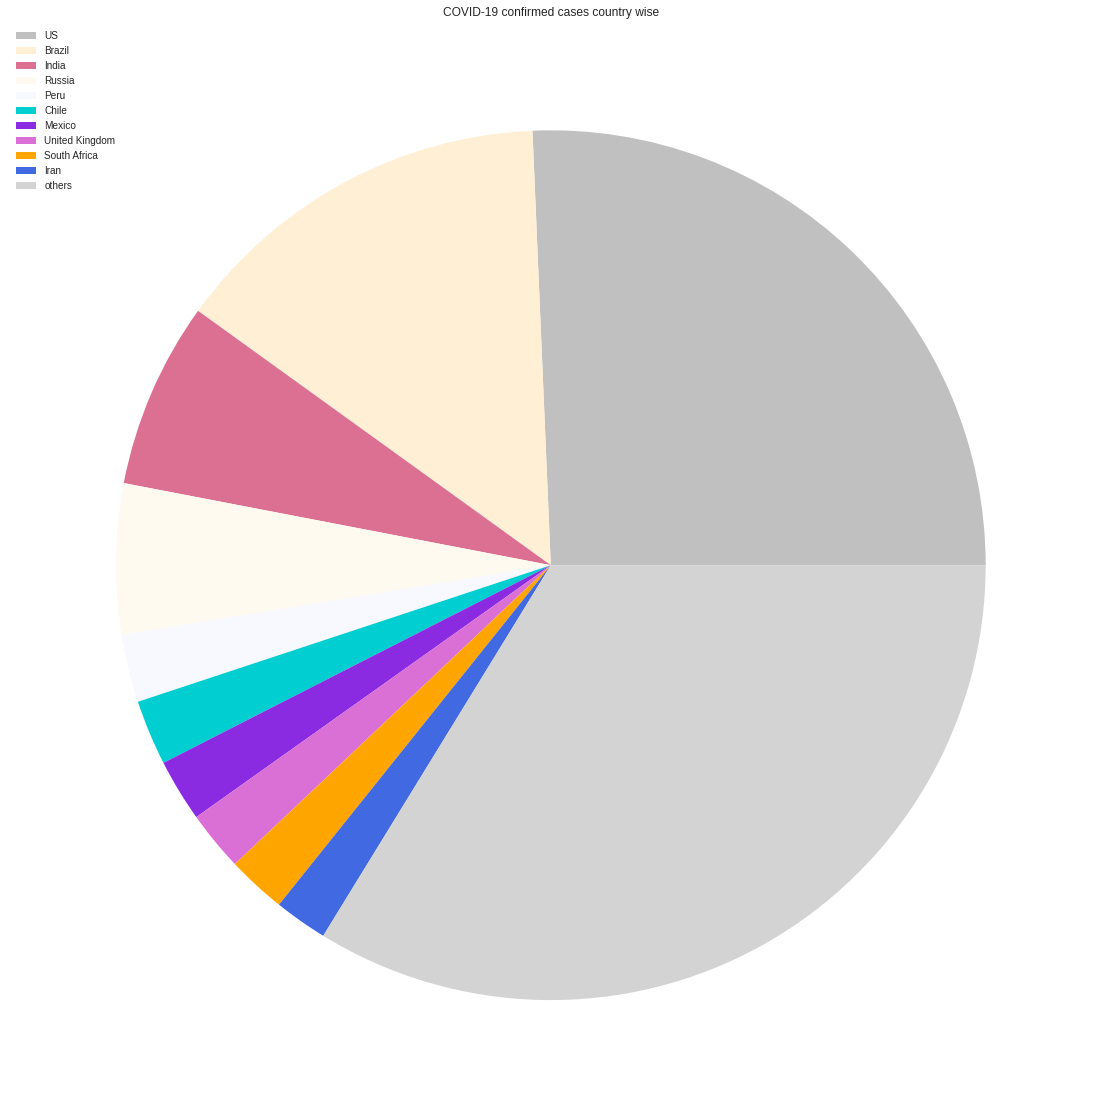

In [78]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('COVID-19 confirmed cases country wise')
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,loc='best')
plt.show()

# **Test train split for predicting number of confirmed cases across the globe**

In [80]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

# **Model building SVM**

In [84]:
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]  #regularization parameter
gamma=[0.01,0.1,1]  #kernel co-efficient
epsilon=[0.01,0.1,1] # no penality is associated with training los function 
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [85]:
svm_search.best_params_

{'C': 1, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly', 'shrinking': True}

In [86]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(future_forecast)

In [87]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
svm_pred

array([1.30244952e+04, 1.30273221e+04, 1.30471104e+04, 1.31008216e+04,
       1.32054169e+04, 1.33778578e+04, 1.36351058e+04, 1.39941222e+04,
       1.44718685e+04, 1.50853060e+04, 1.58513961e+04, 1.67871003e+04,
       1.79093800e+04, 1.92351965e+04, 2.07815113e+04, 2.25652857e+04,
       2.46034813e+04, 2.69130593e+04, 2.95109812e+04, 3.24142084e+04,
       3.56397023e+04, 3.92044243e+04, 4.31253359e+04, 4.74193983e+04,
       5.21035731e+04, 5.71948216e+04, 6.27101052e+04, 6.86663854e+04,
       7.50806235e+04, 8.19697810e+04, 8.93508192e+04, 9.72406995e+04,
       1.05656383e+05, 1.14614832e+05, 1.24133008e+05, 1.34227871e+05,
       1.44916383e+05, 1.56215506e+05, 1.68142201e+05, 1.80713429e+05,
       1.93946152e+05, 2.07857331e+05, 2.22463928e+05, 2.37782904e+05,
       2.53831220e+05, 2.70625839e+05, 2.88183720e+05, 3.06521826e+05,
       3.25657118e+05, 3.45606558e+05, 3.66387106e+05, 3.88015725e+05,
       4.10509375e+05, 4.33885019e+05, 4.58159616e+05, 4.83350130e+05,
      

MAE: 1105248.5834498073
MSE: 1285824654872.823


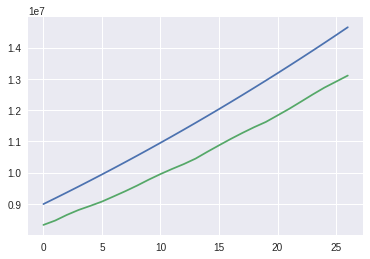

In [91]:
#checking for the test data

svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)

print("MAE:",mean_absolute_error(svm_test_pred,y_test_confirmed))
print("MSE:",mean_squared_error(svm_test_pred,y_test_confirmed))

## Here we can see that the confirmed cases has taken a peak value in the month of june

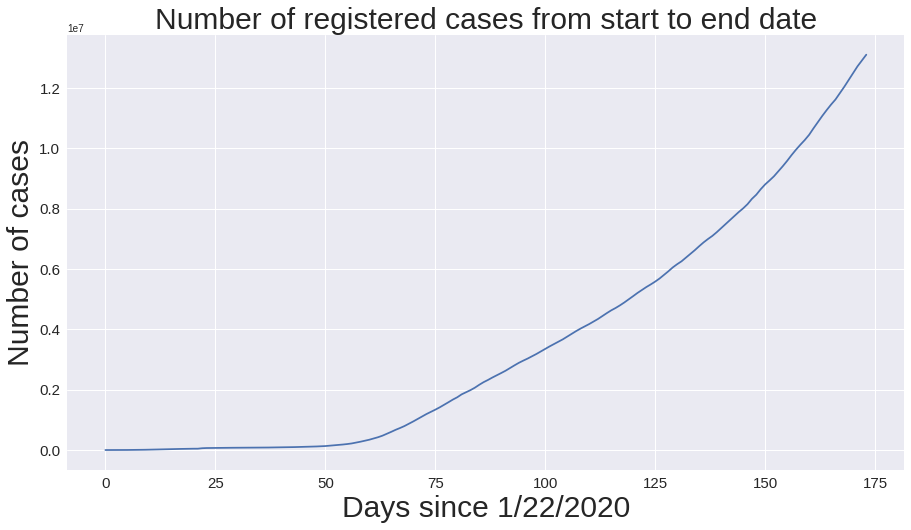

In [95]:
plt.figure(figsize=(15,8))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of registered cases from start to end date',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()



# **Here are the predictions made by my SVM model for the given data and here i am forecasting the confirmed number of cases for the next 10 days,the predicted curve is in color=red**

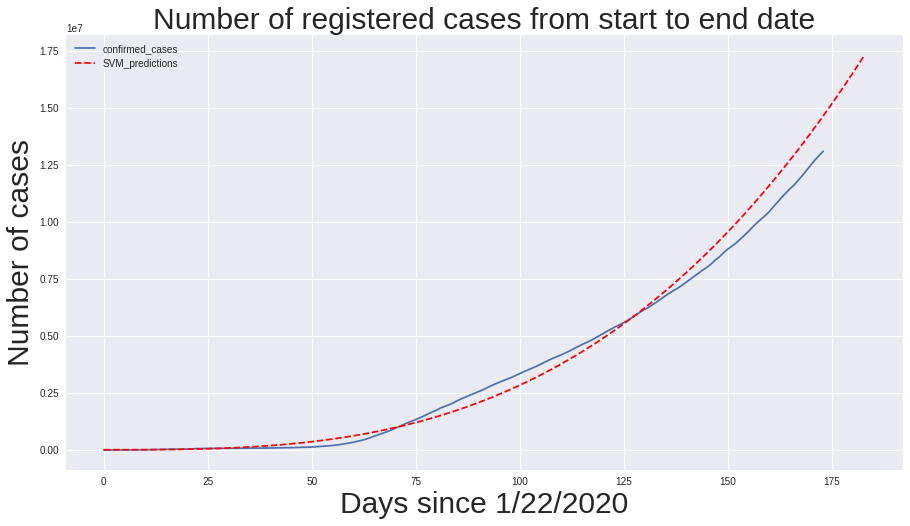

In [97]:
plt.figure(figsize=(15,8))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='red')
plt.title('Number of registered cases from start to end date',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.legend(['confirmed_cases','SVM_predictions'])
plt.show()

In [98]:
#predictions for the next 10 days using svm
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

{('07/14/2020', 14905206.210417189),
 ('07/15/2020', 15163446.433290806),
 ('07/16/2020', 15424654.902095031),
 ('07/17/2020', 15688848.578235429),
 ('07/18/2020', 15956044.423117138),
 ('07/19/2020', 16226259.398145601),
 ('07/20/2020', 16499510.46472599),
 ('07/21/2020', 16775814.584263626),
 ('07/22/2020', 17055188.718163967),
 ('07/23/2020', 17337649.827832278)}

# **Test train split for predicting the number of deaths**

In [100]:
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.15, shuffle=False)

# **SVM model for predicting deaths of COVID-19** 

In [102]:
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]  #regularization parameter
gamma=[0.01,0.1,1]  #kernel co-efficient
epsilon=[0.01,0.1,1] # no penality is associated with training los function 
shrinking=[True,False]
svm_grid_d={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm_d=SVR()
svm_search_d=RandomizedSearchCV(svm_d,svm_grid_d,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,verbose=1)
svm_search_d.fit(X_train_deaths,y_train_deaths)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [103]:
svm_search_d.best_params_

{'C': 0.1, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'poly', 'shrinking': True}

In [104]:
svm_deaths=svm_search_d.best_estimator_
svm_pred_d=svm_deaths.predict(future_forecast)

In [105]:
svm_deaths

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
svm_pred_d

array([-1.77496717e+03, -1.77476886e+03, -1.77338072e+03, -1.76961290e+03,
       -1.76227556e+03, -1.75017888e+03, -1.73213301e+03, -1.70694812e+03,
       -1.67343436e+03, -1.63040190e+03, -1.57666090e+03, -1.51102153e+03,
       -1.43229394e+03, -1.33928830e+03, -1.23081477e+03, -1.10568352e+03,
       -9.62704702e+02, -8.00688479e+02, -6.18445025e+02, -4.14784485e+02,
       -1.88517037e+02,  6.15471660e+01,  3.36597955e+02,  6.37825174e+02,
        9.66418652e+02,  1.32356824e+03,  1.71046377e+03,  2.12829507e+03,
        2.57825199e+03,  3.06152435e+03,  3.57930202e+03,  4.13277481e+03,
        4.72313254e+03,  5.35156511e+03,  6.01926232e+03,  6.72741399e+03,
        7.47720996e+03,  8.26984012e+03,  9.10649427e+03,  9.98836225e+03,
        1.09166339e+04,  1.18924990e+04,  1.29171475e+04,  1.39917691e+04,
        1.51175538e+04,  1.62956913e+04,  1.75273715e+04,  1.88137843e+04,
        2.01561194e+04,  2.15555667e+04,  2.30133161e+04,  2.45305573e+04,
        2.61084803e+04,  

MAE: 304357.62138988555
MSE: 99383160046.44104


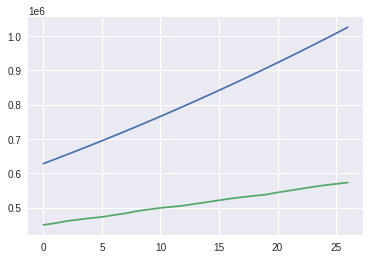

In [109]:
svm_test_pred_deaths=svm_deaths.predict(X_test_deaths)
plt.plot(svm_test_pred_deaths)
plt.plot(y_test_deaths)

print("MAE:",mean_absolute_error(svm_test_pred_deaths,y_test_deaths))
print("MSE:",mean_squared_error(svm_test_pred_deaths,y_test_deaths))

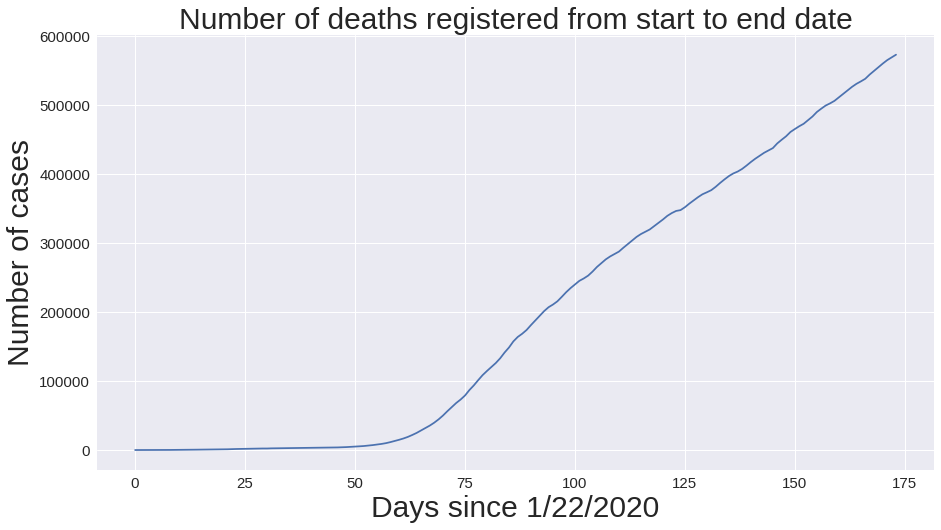

In [110]:
plt.figure(figsize=(15,8))
plt.plot(adjusted_dates,total_deaths)
plt.title('Number of deaths registered from start to end date',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

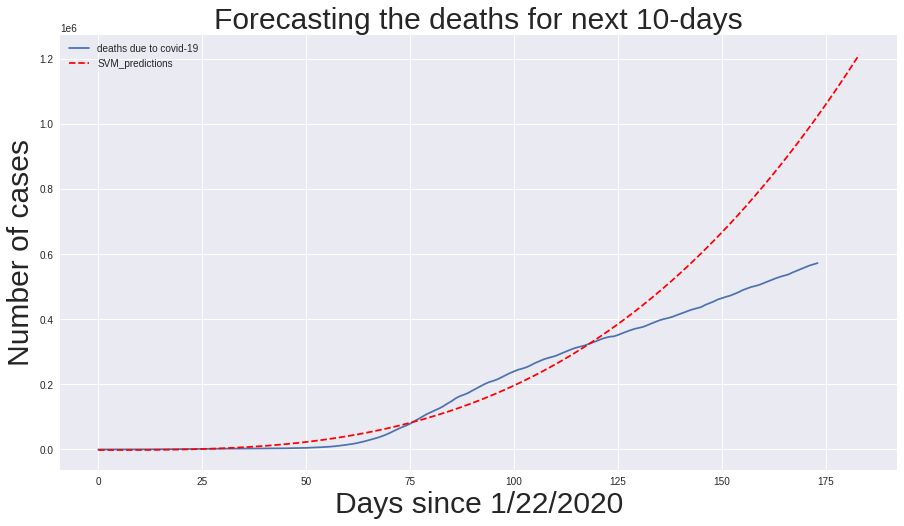

In [113]:
plt.figure(figsize=(15,8))
plt.plot(adjusted_dates,total_deaths)
plt.plot(future_forecast,svm_pred_d,linestyle='dashed',color='red')
plt.title('Forecasting the deaths for next 10-days',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.legend(['deaths due to covid-19','SVM_predictions'])
plt.show()

In [112]:
#predictions for the next 10 days using svm
set(zip(future_forecast_dates[-10:],svm_pred_d[-10:]))

{('07/14/2020', 1042907.2025123899),
 ('07/15/2020', 1061022.6768776244),
 ('07/16/2020', 1079346.37438739),
 ('07/17/2020', 1097879.4827858275),
 ('07/18/2020', 1116623.1956764525),
 ('07/19/2020', 1135578.69469989),
 ('07/20/2020', 1154747.176389343),
 ('07/21/2020', 1174129.8280006712),
 ('07/22/2020', 1193727.8406959837),
 ('07/23/2020', 1213542.407590515)}

# **Forecasting the Recovery of COVID-19 patients using SVM**

In [115]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(days_since_1_22, total_recovered, test_size=0.15, shuffle=False)

In [116]:
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]  #regularization parameter
gamma=[0.01,0.1,1]  #kernel co-efficient
epsilon=[0.01,0.1,1] # no penality is associated with training los function 
shrinking=[True,False]
svm_grid_r={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm_r=SVR()
svm_search_r=RandomizedSearchCV(svm_r,svm_grid_r,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,verbose=1)
svm_search_r.fit(X_train_deaths,y_train_deaths)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.6min remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [117]:
svm_search_r.best_params_

{'C': 1, 'epsilon': 1, 'gamma': 1, 'kernel': 'poly', 'shrinking': True}

In [118]:
svm_recovered=svm_search_r.best_estimator_
svm_pred_r=svm_recovered.predict(future_forecast)

In [119]:
svm_recovered

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=1, kernel='poly',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [120]:
svm_pred_r

array([3.99684978e+01, 4.03029979e+01, 4.26444984e+01, 4.89999997e+01,
       6.13765021e+01, 8.17810064e+01, 1.12220512e+02, 1.54702021e+02,
       2.11232532e+02, 2.83819048e+02, 3.74468567e+02, 4.85188087e+02,
       6.17984615e+02, 7.74865146e+02, 9.57836685e+02, 1.16890623e+03,
       1.41008077e+03, 1.68336733e+03, 1.99077290e+03, 2.33430447e+03,
       2.71596905e+03, 3.13777363e+03, 3.60172521e+03, 4.10983083e+03,
       4.66409743e+03, 5.26653207e+03, 5.91914169e+03, 6.62393334e+03,
       7.38291399e+03, 8.19809066e+03, 9.07147033e+03, 1.00050601e+04,
       1.10008667e+04, 1.20608975e+04, 1.31871592e+04, 1.43816589e+04,
       1.56464037e+04, 1.69834004e+04, 1.83946562e+04, 1.98821780e+04,
       2.14479729e+04, 2.30940476e+04, 2.48224095e+04, 2.66350654e+04,
       2.85340222e+04, 3.05212871e+04, 3.25988672e+04, 3.47687690e+04,
       3.70330000e+04, 3.93935671e+04, 4.18524770e+04, 4.44117371e+04,
       4.70733540e+04, 4.98393352e+04, 5.27116872e+04, 5.56924172e+04,
      

MAE: 4154534.4823123473
MSE: 17881711090996.906


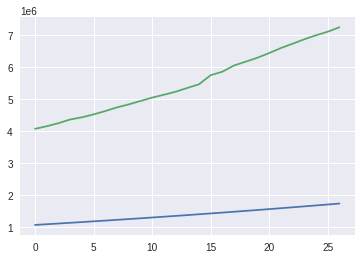

In [124]:
svm_test_pred_recovered=svm_recovered.predict(X_test_r)
plt.plot(svm_test_pred_recovered)
plt.plot(y_test_r)

print("MAE:",mean_absolute_error(svm_test_pred_recovered,y_test_r))
print("MSE:",mean_squared_error(svm_test_pred_recovered,y_test_r))

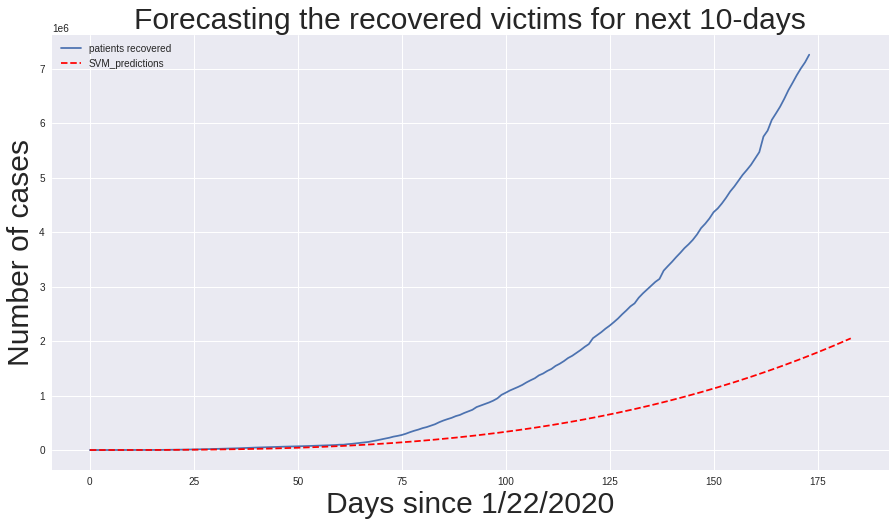

In [125]:
plt.figure(figsize=(15,8))
plt.plot(adjusted_dates,total_recovered)
plt.plot(future_forecast,svm_pred_r,linestyle='dashed',color='red')
plt.title('Forecasting the recovered victims for next 10-days',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.legend(['patients recovered','SVM_predictions'])
plt.show()

## Here is the plot between recovered vs deaths

Text(0.5, 0, 'Time')

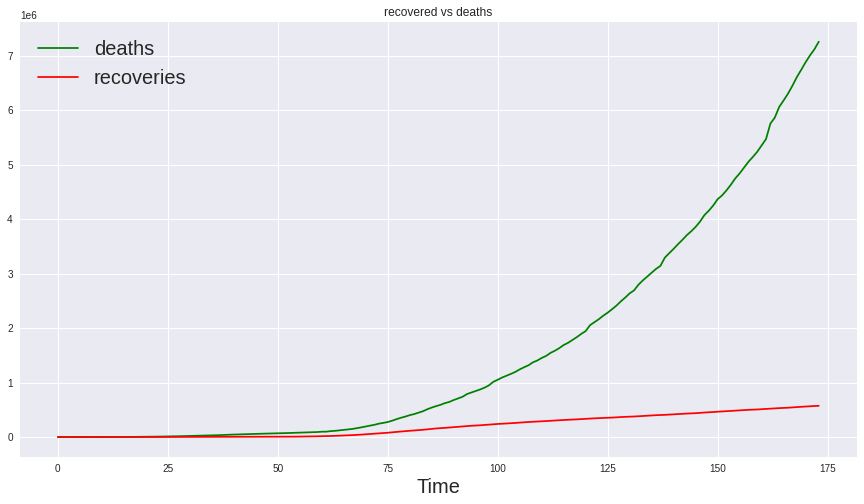

In [126]:
plt.figure(figsize=(15,8))
plt.plot(adjusted_dates,total_recovered,color='green')
plt.plot(adjusted_dates,total_deaths,color='red')
plt.legend(['deaths','recoveries'],loc='best',fontsize=20)
plt.title('recovered vs deaths')
plt.xlabel('Time',size=20)